### 加载npy数据

In [1]:
import numpy as np

# 文件地址
X_path = r"C:\Users\Administrator\Desktop\LJJ\X_data.npy"

# 加载数据
data = np.load(X_path)

# 打印原始数据形状
print(f"原始数据形状: {data.shape}")

# 移除维度
X = np.squeeze(data, axis=1)

# 打印修改后的数据形状
print(f"修改后的数据形状: {X.shape}")



# 文件地址
Y_path = r"C:\Users\Administrator\Desktop\LJJ\y_data.npy"

# 加载数据
Y = np.load(Y_path)

# 打印原始数据形状
print(f"原始数据形状: {Y.shape}")



原始数据形状: (1330, 1, 224, 224, 3)
修改后的数据形状: (1330, 224, 224, 3)
原始数据形状: (1330,)


### 对其中的一行图像进行可视化

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


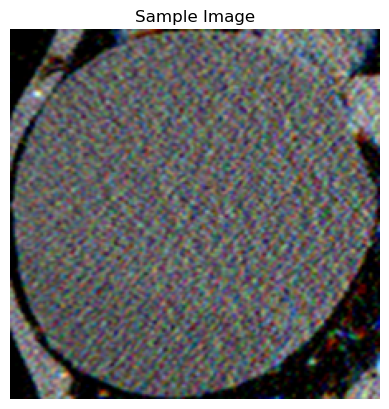

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 img 是你的图像数据，形状为 (224, 224, 3)
img = X[0]  # 示例数据
print(img.shape)
# 绘制图像
plt.imshow(img)
plt.title("Sample Image")
plt.axis('off')  # 不显示坐标轴
plt.show()


In [3]:
### 查看三个通道的图像和图像的像素值分布

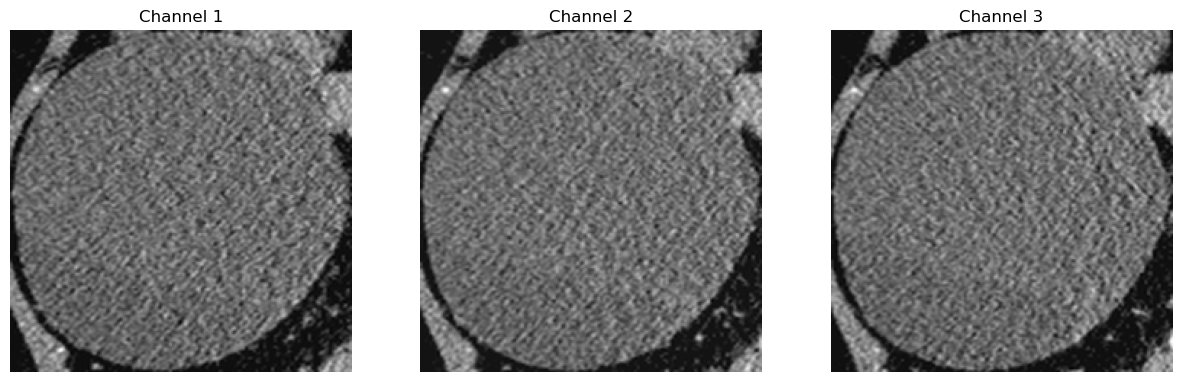

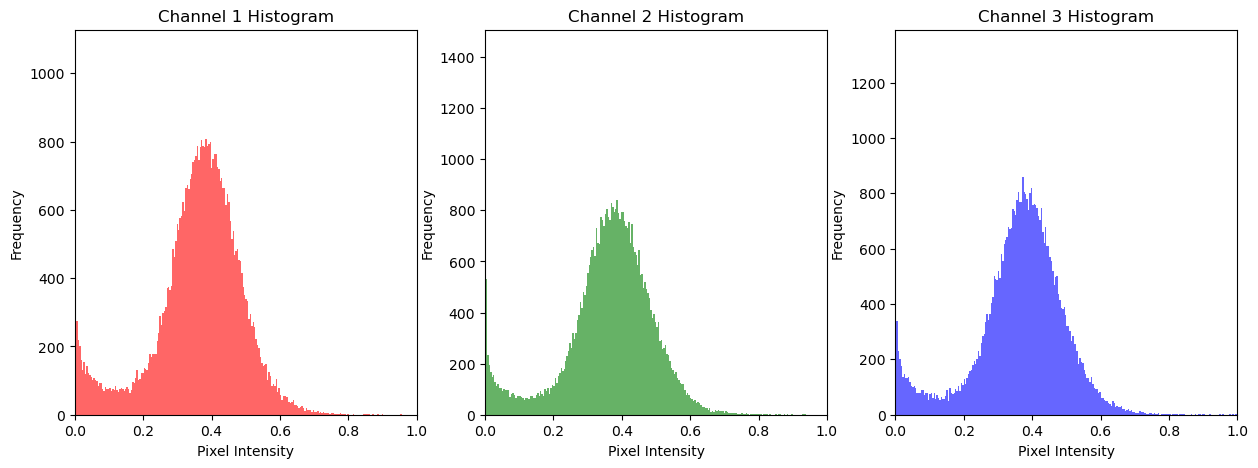

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 img 是你的图像数据，形状为 (224, 224, 3)
img = X[0]  # 示例数据

# 分离三个通道
channel_1 = img[:, :, 0]
channel_2 = img[:, :, 1]
channel_3 = img[:, :, 2]

# 创建一个包含3个子图的图形
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 绘制第一个通道的灰度图像
axs[0].imshow(channel_1, cmap='gray')
axs[0].set_title('Channel 1')
axs[0].axis('off')  # 不显示坐标轴

# 绘制第二个通道的灰度图像
axs[1].imshow(channel_2, cmap='gray')
axs[1].set_title('Channel 2')
axs[1].axis('off')  # 不显示坐标轴

# 绘制第三个通道的灰度图像
axs[2].imshow(channel_3, cmap='gray')
axs[2].set_title('Channel 3')
axs[2].axis('off')  # 不显示坐标轴

# 显示图形
plt.show()




# 创建一个包含3个子图的图形
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 绘制第一个通道的直方图
axs[0].hist(channel_1.flatten(), bins=256, color='r', alpha=0.6)
axs[0].set_title('Channel 1 Histogram')
axs[0].set_xlim([0, 1])  # 根据数据范围设置横坐标范围
axs[0].set_xlabel('Pixel Intensity')
axs[0].set_ylabel('Frequency')

# 绘制第二个通道的直方图
axs[1].hist(channel_2.flatten(), bins=256, color='g', alpha=0.6)
axs[1].set_title('Channel 2 Histogram')
axs[1].set_xlim([0, 1])  # 根据数据范围设置横坐标范围
axs[1].set_xlabel('Pixel Intensity')
axs[1].set_ylabel('Frequency')

# 绘制第三个通道的直方图
axs[2].hist(channel_3.flatten(), bins=256, color='b', alpha=0.6)
axs[2].set_title('Channel 3 Histogram')
axs[2].set_xlim([0, 1])  # 根据数据范围设置横坐标范围
axs[2].set_xlabel('Pixel Intensity')
axs[2].set_ylabel('Frequency')

# 显示图形
plt.show()

### 对图像进行均衡化

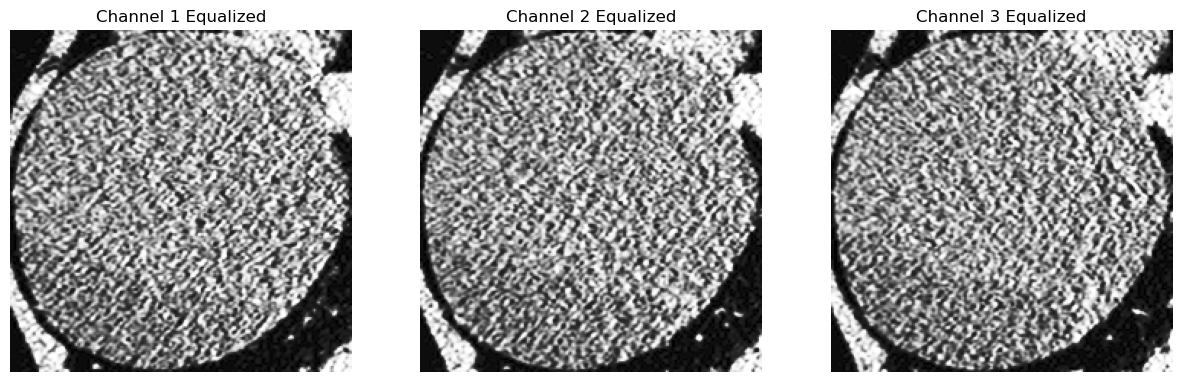

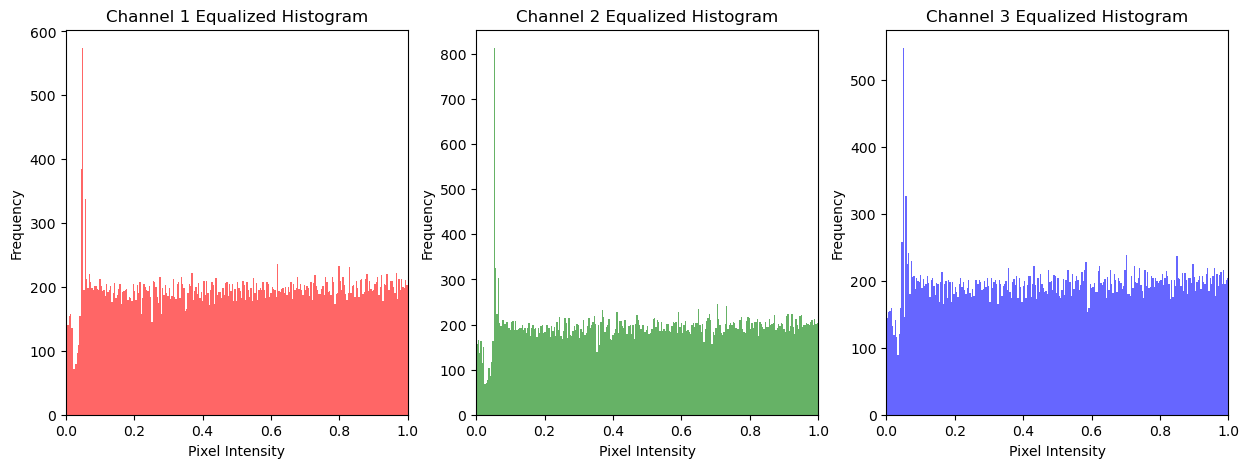

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

# 假设 img 是你的图像数据，形状为 (224, 224, 3)
img = X[0]  # 示例数据

# 分离三个通道
channel_1 = img[:, :, 0]
channel_2 = img[:, :, 1]
channel_3 = img[:, :, 2]

# 对每个通道进行直方图均衡化
channel_1_eq = exposure.equalize_hist(channel_1)
channel_2_eq = exposure.equalize_hist(channel_2)
channel_3_eq = exposure.equalize_hist(channel_3)

# 创建一个包含3个子图的图形来显示处理后的图像
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 绘制第一个通道的处理后图像
axs[0].imshow(channel_1_eq, cmap='gray')
axs[0].set_title('Channel 1 Equalized')
axs[0].axis('off')  # 不显示坐标轴

# 绘制第二个通道的处理后图像
axs[1].imshow(channel_2_eq, cmap='gray')
axs[1].set_title('Channel 2 Equalized')
axs[1].axis('off')  # 不显示坐标轴

# 绘制第三个通道的处理后图像
axs[2].imshow(channel_3_eq, cmap='gray')
axs[2].set_title('Channel 3 Equalized')
axs[2].axis('off')  # 不显示坐标轴

# 显示图形
plt.show()

# 创建一个包含3个子图的图形来显示处理后的像素值直方图
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 绘制第一个通道的处理后像素值直方图
axs[0].hist(channel_1_eq.flatten(), bins=256, color='r', alpha=0.6)
axs[0].set_title('Channel 1 Equalized Histogram')
axs[0].set_xlim([0, 1])  # 根据数据范围设置横坐标范围
axs[0].set_xlabel('Pixel Intensity')
axs[0].set_ylabel('Frequency')

# 绘制第二个通道的处理后像素值直方图
axs[1].hist(channel_2_eq.flatten(), bins=256, color='g', alpha=0.6)
axs[1].set_title('Channel 2 Equalized Histogram')
axs[1].set_xlim([0, 1])  # 根据数据范围设置横坐标范围
axs[1].set_xlabel('Pixel Intensity')
axs[1].set_ylabel('Frequency')

# 绘制第三个通道的处理后像素值直方图
axs[2].hist(channel_3_eq.flatten(), bins=256, color='b', alpha=0.6)
axs[2].set_title('Channel 3 Equalized Histogram')
axs[2].set_xlim([0, 1])  # 根据数据范围设置横坐标范围
axs[2].set_xlabel('Pixel Intensity')
axs[2].set_ylabel('Frequency')

# 显示图形
plt.show()


In [6]:
### 将图像保存到h5文件当中

In [ ]:
import h5py
import numpy as np
import os
from sklearn.model_selection import train_test_split
from skimage import exposure

# 示例数据
X = X
Y = Y

# 创建保存文件的目录
base_dir = r"C:\Users\Administrator\Desktop\临时"
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# 按照7:1:2的比例划分数据集
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_temp, Y_temp, test_size=0.125, random_state=42)

# 定义处理图像的函数
def equalize_hist_image(img):
    equalized_img = np.zeros_like(img)
    for i in range(img.shape[2]):
        equalized_img[:, :, i] = exposure.equalize_hist(img[:, :, i])
    return equalized_img

# 保存数据集到相应的文件夹
def save_h5_files(X, Y, save_dir, prefix):
    for i, (x, y) in enumerate(zip(X, Y)):
        # 对图像进行直方图均衡化处理
        x = equalize_hist_image(x)
        
        file_path = os.path.join(save_dir, f"{prefix}_{i}.h5")
        with h5py.File(file_path, 'w') as h5f:
            h5f.create_dataset('X', data=x)
            h5f.create_dataset('Y', data=y)
        print(f"数据 {prefix}_{i} 已保存到 {file_path}")

# 保存训练集
save_h5_files(X_train, Y_train, train_dir, 'train')
# 保存验证集
save_h5_files(X_valid, Y_valid, valid_dir, 'valid')
# 保存测试集
save_h5_files(X_test, Y_test, test_dir, 'test')

print("所有数据集已保存完成。")


数据 train_0 已保存到 C:\Users\Administrator\Desktop\临时\train\train_0.h5
数据 train_1 已保存到 C:\Users\Administrator\Desktop\临时\train\train_1.h5
数据 train_2 已保存到 C:\Users\Administrator\Desktop\临时\train\train_2.h5
数据 train_3 已保存到 C:\Users\Administrator\Desktop\临时\train\train_3.h5
数据 train_4 已保存到 C:\Users\Administrator\Desktop\临时\train\train_4.h5
数据 train_5 已保存到 C:\Users\Administrator\Desktop\临时\train\train_5.h5
数据 train_6 已保存到 C:\Users\Administrator\Desktop\临时\train\train_6.h5
数据 train_7 已保存到 C:\Users\Administrator\Desktop\临时\train\train_7.h5
数据 train_8 已保存到 C:\Users\Administrator\Desktop\临时\train\train_8.h5
数据 train_9 已保存到 C:\Users\Administrator\Desktop\临时\train\train_9.h5
数据 train_10 已保存到 C:\Users\Administrator\Desktop\临时\train\train_10.h5
数据 train_11 已保存到 C:\Users\Administrator\Desktop\临时\train\train_11.h5
数据 train_12 已保存到 C:\Users\Administrator\Desktop\临时\train\train_12.h5
数据 train_13 已保存到 C:\Users\Administrator\Desktop\临时\train\train_13.h5
数据 train_14 已保存到 C:\Users\Administrator\Desktop\临时\tra

数据 train_125 已保存到 C:\Users\Administrator\Desktop\临时\train\train_125.h5
数据 train_126 已保存到 C:\Users\Administrator\Desktop\临时\train\train_126.h5
数据 train_127 已保存到 C:\Users\Administrator\Desktop\临时\train\train_127.h5
数据 train_128 已保存到 C:\Users\Administrator\Desktop\临时\train\train_128.h5
数据 train_129 已保存到 C:\Users\Administrator\Desktop\临时\train\train_129.h5
数据 train_130 已保存到 C:\Users\Administrator\Desktop\临时\train\train_130.h5
数据 train_131 已保存到 C:\Users\Administrator\Desktop\临时\train\train_131.h5
数据 train_132 已保存到 C:\Users\Administrator\Desktop\临时\train\train_132.h5
数据 train_133 已保存到 C:\Users\Administrator\Desktop\临时\train\train_133.h5
数据 train_134 已保存到 C:\Users\Administrator\Desktop\临时\train\train_134.h5
数据 train_135 已保存到 C:\Users\Administrator\Desktop\临时\train\train_135.h5
数据 train_136 已保存到 C:\Users\Administrator\Desktop\临时\train\train_136.h5
数据 train_137 已保存到 C:\Users\Administrator\Desktop\临时\train\train_137.h5
数据 train_138 已保存到 C:\Users\Administrator\Desktop\临时\train\train_138.h5
数据 tra

数据 train_253 已保存到 C:\Users\Administrator\Desktop\临时\train\train_253.h5
数据 train_254 已保存到 C:\Users\Administrator\Desktop\临时\train\train_254.h5
数据 train_255 已保存到 C:\Users\Administrator\Desktop\临时\train\train_255.h5
数据 train_256 已保存到 C:\Users\Administrator\Desktop\临时\train\train_256.h5
数据 train_257 已保存到 C:\Users\Administrator\Desktop\临时\train\train_257.h5
数据 train_258 已保存到 C:\Users\Administrator\Desktop\临时\train\train_258.h5
数据 train_259 已保存到 C:\Users\Administrator\Desktop\临时\train\train_259.h5
数据 train_260 已保存到 C:\Users\Administrator\Desktop\临时\train\train_260.h5
数据 train_261 已保存到 C:\Users\Administrator\Desktop\临时\train\train_261.h5
数据 train_262 已保存到 C:\Users\Administrator\Desktop\临时\train\train_262.h5
数据 train_263 已保存到 C:\Users\Administrator\Desktop\临时\train\train_263.h5
数据 train_264 已保存到 C:\Users\Administrator\Desktop\临时\train\train_264.h5
数据 train_265 已保存到 C:\Users\Administrator\Desktop\临时\train\train_265.h5
数据 train_266 已保存到 C:\Users\Administrator\Desktop\临时\train\train_266.h5
数据 tra

###  对保存好的一张图像进行可视化，三个通道分别进行可视化

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import h5py
 
# 指定文件路径
file_path = r"C:\Users\Administrator\Desktop\临时\预测\test_7.h5"
 
# 使用h5py库打开文件
with h5py.File(file_path, 'r') as f:
    # 可以查看文件中的键（datasets）
    print("Dataset keys:", list(f.keys()))
 
    # 替换为实际的数据集名称
    dataset_name = 'X'

    if dataset_name in f:
        # 读取数据集内容
        dataset = f[dataset_name]
        data = dataset[()]  # 读取数据到变量中
 
        # 输出数据信息或数据的一部分
        print("Dataset shape:", data.shape)
        print("Sample of data:", data[:10])  # 输出数据的前10个元素作为示例
    else:
        print(f"Dataset '{dataset_name}' not found in the file.")
# 生成一个示例图像 (224, 224, 3)，你也可以使用 cv2.imread() 读取图像
x = data

# 分离三个通道
B, G, R = cv2.split(x)

# 可视化
plt.figure(figsize=(10, 10))

# 显示原始图像
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))  # OpenCV 默认使用 BGR 颜色顺序，需要转换为 RGB
plt.axis('off')

# 显示蓝色通道
plt.subplot(2, 2, 2)
plt.title('Blue Channel')
plt.imshow(B, cmap='gray')
plt.axis('off')

# 显示绿色通道
plt.subplot(2, 2, 3)
plt.title('Green Channel')
plt.imshow(G, cmap='gray')
plt.axis('off')

# 显示红色通道
plt.subplot(2, 2, 4)
plt.title('Red Channel')
plt.imshow(R, cmap='gray')
plt.axis('off')

plt.show()
